#  DATA CHALLENGE  POSOS: Saimourya Surabhi,Maeva Caillat 



#### INTRODUCTION

The main intention of this data challenge is to classify the question intent. There are various classification methods that can be used like Navies Bayes, SVM etc. from supervised learing and using deep learning methods such as CNN and RNN .
We have choosen to use SVM for the intent classifaction based on the paper[CNN for sentence classification](https://ui.adsabs.harvard.edu/abs/2014arXiv1408.5882K) where in the section model variations when comparing CNN to other models they results  show 95.6% accuracy score when intent classification is performned using SVM on the TREC dataset( TREC question dataset—task involvesclassifying a question into 6 question types whether the question is about person, location, numeric information, etc.) (Li andRoth, 2002)

      



#### SVM

A Support Vector Machine (SVM) is a discriminative classifier defined by a separating hyperplane. In other words, given labeled training data, the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.



In [7]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import csv
import re
import matplotlib.pyplot as plt
import spacy 
import nltk 


Importing the datasets  as they are encoded in the format UTF_8 we have decoded them and converted them into a readbles csv file

In [8]:
path="C:/Users/91970/Documents/MASTERS/YEAR 2/data challenge/Data/"


df_1 = path+'input_train.csv'
with open(df_1, newline='', encoding='utf-8') as f:
    #reading the decoded file
    reader = csv.reader(f)
    a=[]
    for row in reader:
        a.append(row)
a.pop(0)
#converting it into a dataframe
input_t=pd.DataFrame(a,columns=["ID","questions"])
l=len(input_t)

df_2=open(path + "output_train.csv")
Output_t=pd.read_csv(df_2)


df_3=path + 'input_test_b1Yip6O.csv'
with open(df_3, newline='', encoding='utf-8') as g:
    #reading the decoded file
    reader = csv.reader(g)
    b=[]
    for row in reader:
        b.append(row)
b.pop(0)
#converting it into a dataframe
input_test=pd.DataFrame(b,columns=["ID","questions"])

Geeting a look at the data that is  how the data arranged and the ferquency of intention of the questions to get an overall picture

  ID                                          questions
0  0  bonjour,  je m suis trompé de forum pour ma qu...
1  1  est ce que le motilium me soulagera contre les...
2  2  mon médecin m'a prescrit adenyl. au 2ème cache...
3  3  Est-ce qu'il existe une forme adaptée aux enfa...
4  4  mon  medecin  me soigne  pour  une  rhino  pha...
   ID  intention
0   0         28
1   1         31
2   2         28
3   3         44
4   4         31 (8028, 2)


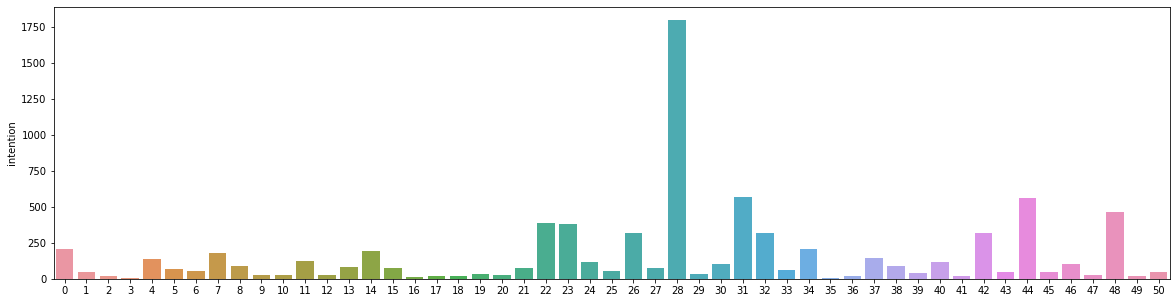

In [9]:
print(input_t.head())
print(Output_t.head(),Output_t.shape)

fig = plt.figure(figsize=(20,5))
sns.barplot(x = Output_t["intention"].unique(), y=Output_t['intention'].value_counts())
plt.show()


## Tokening and pre-processsing the text using spaCy and NLTK

Cleaning all the charcaters other than words and numbers in the string suing re pacakge.After cleaning tokenising the string and then lemmatizing the words so that they can be anlysed as single item using spaCy.And then removing the stopwords. To convert all the words in the string into lower form other function called "clean_text" is written.As all of tokenised words are lists in order to make convert then into string's again a function called "listtostring" is written to get an easy reference with the orginal datafarme

In [10]:
import re
nlp = spacy.load("fr_core_news_md")
stop_words = nltk.corpus.stopwords.words('french')

def clean_str(string):
    #cleaning the characters in string 
    string=re.sub(r"[^a-zA-Z0-9]+", ' ', string)
    string = re.sub(r'[0-9\.]+', '', string)
    #Creating our token object, which is used to create documents with linguistic annotations.
    doc = nlp(string)
    #Lemmatizing each token and converting each token into lowercase
    tokens = [ doc.lemma_.lower().strip() if doc.lemma_ != "-PRON-" else doc.lower_ for doc in doc]

    # Removing stop words
    #tokens = [ doc for doc in tokens if doc not in stop_words]

    # return preprocessed list of tokens
    return tokens

# Removing spaces and converting text into lowercase
def clean_text(text):
    return text.strip().lower()

#  coversting list to string  
def listToString(s):  
     # initialize an empty string 
    str1 = " "    
    return (str1.join(s))

    



Appending the cleaned data to lists X ,y and Y where X is for questions and y is for intentions and Y is test question data  for an easy acces

In [11]:
#intialisng empty lists X and Y
X = [] 
Y=[]

for i in range(input_t.shape[0]):
    k=clean_str(input_t.iloc[i][1])
    X.append(clean_text(listToString(k)))
    
y = np.array(Output_t["intention"])

for i in range(input_test.shape[0]):
    j=clean_str(input_test.iloc[i][1])
    Y.append(clean_text(listToString(j)))
print(X[1:10])
print(Y[1:10])
print(y[1:10])

['être ce que le motilium me soulager contre le nau es', 'mon m decin m avoir prescrire adenyl au  me cachet un mal de t te terrible et au  me palpitation sueur froid chaleur intense dans le t te tremblement fourmillements dans le l vre sup rieure difficult s respirer d s l arr t de m dicament tout le sympt mes avoir disparaître cela être il d j arriv quelqu un', 'être ce que il existe un forme adapt e al enfer de an de micropakine', 'mon medecin me soigne pour un rhino pharingit et m avoir prescrire de amoxicilline comme anti biotique être ce vraiment pour ce indication', 'je venir d apprendre que je être enceint savoir vous si je pouvoir poursuivre le rubozinc', 'atrax n être il pas dangereux au long terme', 'je être sous mercilon j avoir un nau es et un saignement', 'l atenolol c être quoi', 'je prendre trinordiol et le fin de mon premi re plaquette j avoir avoir mon premi re fois ac mn copain le pilule être donc bien efficace d s le debut j avoir un douleur dans le poitrine j avoir

The train test split of the data to start model building. As a general convention we took 70% as training data and 30% as testing data

In [12]:
#spliting the dataframe into 7:3 for train test using train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.3)

CountVectorizer: It transforms the review to token count matrix. First, it tokenizes the text and according to number of occurrence of each token, and a sparse matrix is created. To get a much more detailed explanation on [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

TF-IDF or Tdiftransformer: Its value represents the importance of a word to a document in a corpus. TF-IDF value is proportional to the frequency of a word in a document. Calculation of TF-IDF value: suppose a review contain 100 words wherein the word Awesome appears 5 times. The term frequency (i.e., TF) for Awesome then (5 / 100) = 0.05. Again, suppose there are 1 million reviews in the corpus and the word Awesome appears 1000 times in whole corpus Then, the inverse document frequency (i.e., IDF) is calculated as log(1,000,000 / 1,000) = 3. Thus, the TF-IDF value is calculated as: 0.05 * 3 = 0.15.Now, the numeric vectors are given as input to the support vector machine algorithm.To get a much more detailed explanation on
[TF-IDF](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)

Since the number of features are generally large in text case, the linear kernel generally performs best.
Another challenge here is the multi class classification one. For that at the support vector machine implementation, we have used the OneVsRest classifier concept. The OneVsRest strategy involves training a single classiﬁer per class, with the samples of that class as positive samples and all other samples as negatives. This strategy requires the base classiﬁers to produce a real-valued conﬁdence score for its decision, rather than just a class label; discrete class labels alone can lead to ambiguities, where multiple classes are predicted for a single sample.

To make the classifier design production ready, we created a pipeline of all these processes discussed above thus making it easier to move to other systems.

In [13]:
#pipeline of feature engineering and model 
#importingCountVectorizer, TfidfVectorizer, TfidfTransformer for feature extraction of text
# OneVsRestClassifier and  LinearSVC for classifier 

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

model = Pipeline([('vectorizer', CountVectorizer()),
 ('tfidf', TfidfTransformer()),
 ('clf', OneVsRestClassifier(LinearSVC(multi_class="crammer_singer",class_weight="balanced",max_iter=1000)))])
#the class_weight="balanced" option tries to remove the biasedness of model towards majority sample
#multi_class="crammer_singer"  optimizes a joint objective over all classes

Parameter tuning plays a important role. It has been observed that with proper parameter values set, model’s performance increase reasonably. We found the suitable parameters in our case using grid search as shown below by giving various range of n_grams .

In [14]:
from sklearn.model_selection import GridSearchCV
parameters = {'vectorizer__ngram_range': [(1,1),(2,3),(1, 2)],
               'tfidf__use_idf': (True, False)}
gs_clf_svm = GridSearchCV(model,parameters, n_jobs=-1,cv= 5)
gs_clf_svm = gs_clf_svm.fit(X, y)
print(gs_clf_svm.best_score_)
print(gs_clf_svm.best_params_)

0.6765072247135028
{'tfidf__use_idf': True, 'vectorizer__ngram_range': (1, 2)}


So, now we got the suitable parameters from grid search. It’s time to prepare the final pipeline using the best suited parameters

In [15]:
from sklearn.pipeline import Pipeline
model = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,2))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', OneVsRestClassifier(LinearSVC(multi_class="crammer_singer",class_weight="balanced",max_iter=1000)))])

Then, we fit the model with training data and test data to just have an overview of the overall perfomance.
We use accuracy_score from sklearnmetrics to test the accuracy.

In [16]:
#fit model with training data
model.fit(X_train,Y_train)

#evaluation on test data
pred = model.predict(X_test)

#accuracy score
from sklearn.metrics import accuracy_score
A_C =accuracy_score(pred, Y_test)
print("The accuracy score is :",  A_C )

#confusion matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix(pred, Y_test)

The accuracy score is : 0.6629306766293067


array([[35,  0,  0, ...,  1,  0,  0],
       [ 0,  0,  0, ...,  0,  1,  0],
       [ 0,  0,  5, ...,  0,  0,  0],
       ...,
       [ 1,  0,  0, ..., 75,  0,  0],
       [ 0,  0,  0, ...,  0,  4,  0],
       [ 0,  0,  0, ...,  0,  0,  7]], dtype=int64)

Now we test the model for predictions

In [17]:
# testing the predictions
test_predictions = model.predict(Y)
print(test_predictions)

[29 32 28 ... 28 14 34]


Generating a output csv file

In [12]:
data_path=path+"Ytest.csv"
with open(data_path, 'w', newline='') as csvfile:
    
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['ID'] + ['intentions'])
    for k in range(len(test_predictions)):
        writer.writerow([l+k] + [test_predictions[k]])

Learning curve 

The following function plot_learning_curve is the same as [plot_learning_curve](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py)

In [68]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


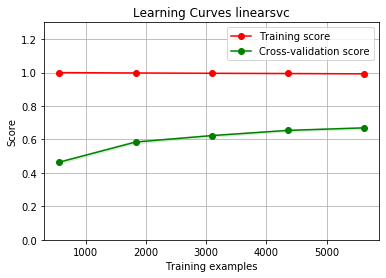

In [62]:
title = "Learning Curves linearsvc"
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
plot_learning_curve(model, title, X, y, ylim=(0,1.30), cv=cv, n_jobs=4)
plt.show()

We see the learning curve of the LinearSVC. We can see clearly that the training score is still around the maximum and the validation score is less in the start and increases at the end it could be noted that the validation score can be increased with more training samples.